<a href="https://colab.research.google.com/github/JoHussien/DeepLearningCourse/blob/main/Assignment%20One/Python/kNN_HW1_900183162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#mount Google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls
!ls "drive/My Drive/CSCE4604_DeepLearning/assignment1/data"

drive  sample_data
flower_photos


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from six.moves import cPickle as pickle
import platform
from itertools import chain
from sklearn.model_selection import KFold
import random
import operator 


In [6]:
def make_data(data_dir, categories, data,data_0,data_1,data_2,data_3,data_4):
  for cat in categories:
    path = os.path.join(data_dir, cat)
    label = categories.index(cat)
    print("Started at Label: ", label) 
    for img_name in os.listdir(path):
      img_path = os.path.join(path,img_name)
      image = cv2.imread(img_path)

      try:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224,224))
        image = np.array(image, dtype=np.float32)
        data.append([image,label])
        if(label == 0):
          data_0.append([image,label])
        elif(label == 1):
          data_1.append([image,label])
        elif(label == 2):
          data_2.append([image,label])
        elif(label == 3):
          data_3.append([image,label])
        elif(label == 4):
          data_4.append([image,label])
      except Exception as e:
        pass
  
  print("Length of the dataset is ", len(data), " images")
  pik_path = os.path.join(data_dir, 'data.pickle')
  pik = open('data.pickle', 'wb')
  pickle.dump(data, pik)
  pik.close()
def make_pickle(data_dir, data, name):
  pik_path = os.path.join(data_dir, name)
  pik = open(pik_path, 'wb')
  pickle.dump(data, pik)
  pik.close()

In [7]:
data_dir = 'drive/My Drive/CSCE4604_DeepLearning/assignment1/data/flower_photos'

categories = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [8]:
#Loading the data and making a pickle file from it


# Full dataset
data = []
# Partionned the dataset into five small datasets each one for each class of the data, data_0 corresponds to 'daisy', etc
data_0 = []
data_1 = []
data_2 = []
data_3 = []
data_4 = []

# make_data(data_dir, categories, data,data_0,data_1,data_2,data_3,data_4)

#Now we created a pickle file of our data and it's stored at our flower_photos directory
#So there is no need to neither do the make_data again nor the make_pickle

In [9]:
# make_pickle(data_dir, data)

# make_pickle(data_dir, data_0, 'data_0.pickle')
# make_pickle(data_dir, data_1, 'data_1.pickle')
# make_pickle(data_dir, data_2, 'data_2.pickle')
# make_pickle(data_dir, data_3, 'data_3.pickle')
# make_pickle(data_dir, data_4, 'data_4.pickle')

In [10]:
def load_data(pickle_path):
  feature = []
  labels = []
  pick = open(pickle_path,'rb')
  data = pickle.load(pick)
  pick.close()

  np.random.shuffle(data)

  for img,label in data:
    feature.append(img)
    labels.append(label)
  feature = np.array(feature, dtype=np.float32)
  labels = np.array(labels)

  # feature = feature/255
  return [feature,labels]

In [11]:
ex = [1,2,3,4,5,6,7,8,9,10]
print(ex[-3:])
print(ex[0:len(ex) - 3])

[8, 9, 10]
[1, 2, 3, 4, 5, 6, 7]


In [11]:
# pickle_path = os.path.join(data_dir, 'data_0.pickle')
# (feature_0,labels_0) = load_data(pickle_path)
# test_0_feature = feature_0[-100:]
# test_0_labels = labels_0[-100:]
# train_0_feature = feature_0[0:len(feature_0) - 100]
# train_0_labels = labels_0[0:len(labels_0) - 100]

# pickle_path = os.path.join(data_dir, 'data_1.pickle')
# (feature_1,labels_1) = load_data(pickle_path)
# test_1_feature = feature_1[-100:]
# test_1_labels = labels_1[-100:]
# train_1_feature = feature_1[0:len(feature_1) - 100]
# train_1_labels = labels_1[0:len(labels_1) - 100]


# pickle_path = os.path.join(data_dir, 'data_2.pickle')
# (feature_2,labels_2) = load_data(pickle_path)
# test_2_feature = feature_2[-100:]
# test_2_labels = labels_2[-100:]
# train_2_feature = feature_2[0:len(feature_2) - 100]
# train_2_labels = labels_2[0:len(labels_2) - 100]


# pickle_path = os.path.join(data_dir, 'data_3.pickle')
# (feature_3,labels_3) = load_data(pickle_path)
# test_3_feature = feature_3[-100:]
# test_3_labels = labels_3[-100:]
# train_3_feature = feature_3[0:len(feature_3) - 100]
# train_3_labels = labels_3[0:len(labels_3) - 100]


# pickle_path = os.path.join(data_dir, 'data_4.pickle')
# (feature_4,labels_4) = load_data(pickle_path)
# test_4_feature = feature_4[-100:]
# test_4_labels = labels_4[-100:]
# train_4_feature = feature_4[0:len(feature_4) - 100]
# train_4_labels = labels_4[0:len(labels_4) - 100]

In [12]:
# x_train = list(chain(train_0_feature , train_1_feature , train_2_feature , train_3_feature , train_4_feature) )
# y_train = list(chain(train_0_labels , train_1_labels , train_2_labels , train_3_labels , train_4_labels ))
# x_test = list(chain(test_0_feature , test_1_feature , test_2_feature , test_3_feature,  test_4_feature))
# y_test = list(chain(test_0_labels , test_1_labels , test_2_labels , test_3_labels , test_4_labels ))

In [180]:
pickle_path = os.path.join(data_dir, 'data.pickle')
(feature,labels) = load_data(pickle_path)
from sklearn.utils import shuffle
feature, labels = shuffle(feature, labels, random_state=0)
test_feature = feature[-500:]
test_labels = labels[-500:]
train_feature = feature[0:len(feature) - 500]
train_labels = labels[0:len(labels) - 500]

In [181]:
print("Total number of data points is = ",feature.shape[0])
x_train = train_feature
y_train = train_labels
x_test = test_feature
y_test = test_labels

Total number of data points is =  3670


In [182]:
#converting the lists to numpy array to make everything quicker
X_train = np.array(x_train)
Y_train = np.array(y_train)
X_test = np.array(x_test)
Y_test = np.array(y_test)
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (3170, 224, 224, 3)
Training labels shape:  (3170,)
Test data shape:  (500, 224, 224, 3)
Test labels shape:  (500,)


In [183]:
def resize_img_arr(array, height, width):
  array_resized = np.empty([array.shape[0], height, width, array.shape[3]])
  for i in range(array.shape[0]):
    array_resized[i] = cv2.resize(np.copy(array[i]), (height, width))
  return array_resized

# Resizing the trainning and the testing arrays to 64*64 images
height = 64
width = 64
X_train_resized = resize_img_arr(X_train, height, width)
X_test_resized = resize_img_arr(X_test, height, width)
print("Dimensions of the images after resizing")
print(X_train_resized.shape)
print(X_test_resized.shape)


Dimensions of the images after resizing
(3170, 64, 64, 3)
(500, 64, 64, 3)


roses


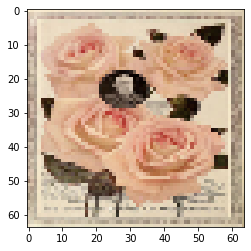

In [184]:
#Visualizing a random image to check eveything is correct till now
print(categories[Y_train[105]])
plt.imshow(X_train_resized[105].astype('uint8'))

Sample Images from each class

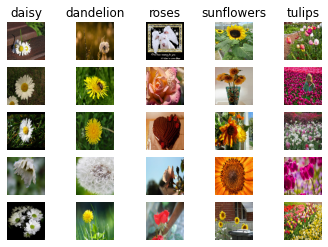

In [185]:

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_resized[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [186]:
# Reshape the image data into rows
x = height * width * 3
X_train_resized = np.reshape(X_train_resized, (X_train_resized.shape[0], x))
X_test_resized = np.reshape(X_test_resized, (X_test_resized.shape[0], -1))
print (X_train_resized.shape, X_test_resized.shape)

(3170, 12288) (500, 12288)


In [187]:

def getHighestNeighbour(neighbors):
    Votes = {}
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
    sortedVotes = sorted(Votes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]


K-Nearest Neighbour Algorithm

In [188]:
class KNearestNeighbor(object):
    #http://cs231n.github.io/classification/
    def __init__(self):
        pass

    def train(self, X, y):
        """ X is N x D where each row is an example. Y is 1-dimension of size N """
        # the nearest neighbor classifier simply remembers all the training data
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k, l='L1'):
        """ X is N x D where each row is an example we wish to predict label for """
        self.k = k
        num_test = X.shape[0]
        # lets make sure that the output type matches the input type
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)
        # loop over all test rows
        for i in range(num_test):
            # find the nearest training example to the i'th test example
            if l == 'L1':
                # using the L1 distance (sum of absolute value differences)
                distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
                # sp = np.abs(self.Xtr - X[i,:]).shape
                # print(sp)
            else:
                distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
            # Now we will use k to get the nearest k neighbors
            neighbours = distances.argsort()[:k] # Get the k-minimum distances
            #get the labels corresponding to those neighbours
            neighbours_labels = self.ytr[neighbours] # get the labels corresponding to those k-nn
            #get the most voted label out of the k-nn
            nearest_neighbour_label = getHighestNeighbour(neighbours_labels) # get the label of the k-nn
            # min_index = np.argmin(distances) 
            Ypred[i] = nearest_neighbour_label # predict the label of the nearest example
    
        return Ypred

Cross Validation

In [189]:
k_values = [1,3,5,8,15,20]
print("The k values we will be testing are: ", k_values)

The k values we will be testing are:  [1, 3, 5, 8, 15, 20]


In [31]:

# This by default splits the data into 80% for trainning and 20% for testing or validation
# We will have n_splits 5 because we will do a 5-fold cross validation
kf = KFold(n_splits=5)
all_accuracies = []

avg_accuracies = []
deviations = []
for k in k_values:
  accuracies = []
  i=1
  for train_index, validate_index in kf.split(X_train_resized):
    # print("TRAIN:", train_index, "TEST:", validate_index)
    X_train_cross, X_validate_cross = X_train_resized[train_index], X_train_resized[validate_index]
    Y_train_cross, Y_validate_cross = Y_train[train_index], Y_train[validate_index]
    # Create a classifier instance and train it with training data
    classifier = KNearestNeighbor()
    classifier.train(X_train_cross, Y_train_cross)
    # Predict the labels of testing data
    y_test_pred = classifier.predict(X_validate_cross, k,'L1')
    print("Number of validation data points = ",X_validate_cross.shape[0])
    num_test = X_validate_cross.shape[0]
    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == Y_validate_cross)
    accuracy = float(num_correct) / num_test
    print ('For k = %d in %d-fold Got  %d / %d correct => accuracy: %f' % (k,i, num_correct, num_test, accuracy))
    accuracies.append(accuracy)
    i+=1
  all_accuracies.append(accuracies)
  np_accuracies = np.array(accuracies)
  avg_accuracy = np.mean(np_accuracies)
  deviation = np.std(np_accuracies)
  avg_accuracies.append(avg_accuracy)
  deviations.append(deviation)
print(all_accuracies)
print("Average Acurracies for each k: ", avg_accuracies) 
print("Standard Deviation values for each k: ",deviations)
# logic for cross validation 
  # for each k value we do 5-fold cross validation and we report the average of accuracies for this k and the std deviation.
  # Then we plot the k versus its value.
  # how to split: assuming 80% 20% split  given size of dataset is X_train.shape[0]

Number of validation data points =  634
For k = 1 in 1-fold Got  231 / 634 correct => accuracy: 0.364353
Number of validation data points =  634
For k = 1 in 2-fold Got  237 / 634 correct => accuracy: 0.373817
Number of validation data points =  634
For k = 1 in 3-fold Got  244 / 634 correct => accuracy: 0.384858
Number of validation data points =  634
For k = 1 in 4-fold Got  249 / 634 correct => accuracy: 0.392744
Number of validation data points =  634
For k = 1 in 5-fold Got  242 / 634 correct => accuracy: 0.381703
Number of validation data points =  634
For k = 3 in 1-fold Got  239 / 634 correct => accuracy: 0.376972
Number of validation data points =  634
For k = 3 in 2-fold Got  232 / 634 correct => accuracy: 0.365931
Number of validation data points =  634
For k = 3 in 3-fold Got  240 / 634 correct => accuracy: 0.378549
Number of validation data points =  634
For k = 3 in 4-fold Got  225 / 634 correct => accuracy: 0.354890
Number of validation data points =  634
For k = 3 in 5-

Plot of cross-validation accuracy (Y axis) versus number of neighborhood 'k'
(X axis) showing the best chosen 'k'

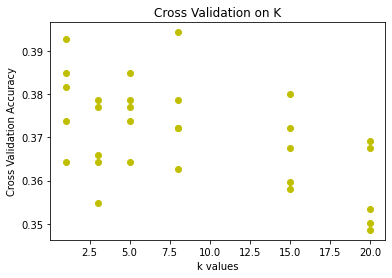

In [190]:
plt.figure()
accuracies  = all_accuracies
k = k_values
# plotting using plt.pyplot() Figure 2
plt.plot(k, accuracies, 'yo')


# axis labeling
plt.xlabel('k values')
plt.ylabel('Cross Validation Accuracy')

# figure name
plt.title('Cross Validation on K')

plt.show()

In [191]:
# Create a classifier instance and train it with training data
classifier = KNearestNeighbor()
classifier.train(X_train_resized, Y_train)

In [192]:
# Predict the labels of testing data
k = 5
y_test_pred = classifier.predict(X_test_resized, k,'L1')


In [193]:
print("Number of test points is = ", X_test_resized.shape[0])
num_test = X_test_resized.shape[0]

Number of test points is =  500


In [194]:
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 176 / 500 correct => accuracy: 0.352000


In [195]:
print("ACCR Accuracy is ", accuracy*100, "%" )

ACCR Accuracy is  35.199999999999996 %




---



---



Doing the Same thing but on grey scale images

In [196]:
#converting the lists to numpy array to make everything quicker
X_train = np.array(x_train)
Y_train = np.array(y_train)
X_test = np.array(x_test)
Y_test = np.array(y_test)
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (3170, 224, 224, 3)
Training labels shape:  (3170,)
Test data shape:  (500, 224, 224, 3)
Test labels shape:  (500,)


In [197]:
def resize_img_arr(array, height, width):
  array_resized = np.empty([array.shape[0], height, width, array.shape[3]])
  for i in range(array.shape[0]):
    array_resized[i] = cv2.resize(np.copy(array[i]), (height, width))
  return array_resized

# Resizing the trainning and the testing arrays to 64*64 images
height = 64
width = 64
X_train_resized = resize_img_arr(X_train, height, width)
X_test_resized = resize_img_arr(X_test, height, width)
print("Dimensions of the images after resizing")
print(X_train_resized.shape)
print(X_test_resized.shape)


Dimensions of the images after resizing
(3170, 64, 64, 3)
(500, 64, 64, 3)


roses


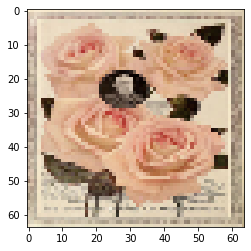

In [198]:
#Visualizing a random image to check eveything is correct till now
print(categories[Y_train[105]])
plt.imshow(X_train_resized[105].astype('uint8'))

Now I will convert the images to greyscale to be used for the second set of experiments

In [199]:
def grey_images(array):
  array_grey = np.empty([array.shape[0], array.shape[1], array.shape[2]])
  for i in range(array.shape[0]):
    image = array[i]
    array_grey[i] = np.dot(image[...,:3], [1/3, 1/3, 1/3])
  return array_grey

# Recoloring the images to grey scale the trainning and the testing
 
X_train_grey = grey_images(X_train_resized)
X_test_grey = grey_images(X_test_resized)


tulips


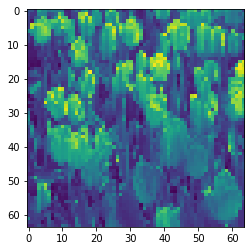

In [200]:
#Visualizing a random image to check eveything is correct till now
print(categories[Y_test[107]])
plt.imshow(X_test_grey[107].astype('uint8'))

Sample Images from each class

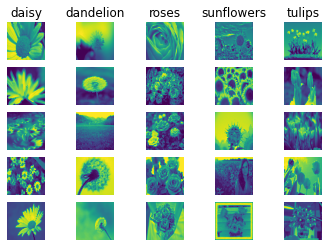

In [201]:

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train_grey[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [202]:
# Reshape the image data into rows
x = height * width 
X_train_grey = np.reshape(X_train_grey, (X_train_grey.shape[0], x))
X_test_grey = np.reshape(X_test_grey, (X_test_grey.shape[0], -1))
print (X_train_grey.shape, X_test_grey.shape)

(3170, 4096) (500, 4096)


In [203]:
# Create a classifier instance and train it with training data
classifier = KNearestNeighbor()
classifier.train(X_train_grey, Y_train)

In [204]:
# Predict the labels of testing data
k = 5
y_test_pred = classifier.predict(X_test_grey, k,'L1')


In [205]:
print("Number of test points is = ", X_test_grey.shape[0])
num_test = X_test_grey.shape[0]

Number of test points is =  500


In [206]:
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 154 / 500 correct => accuracy: 0.308000


In [207]:
print("ACCR Accuracy is ", accuracy*100, "%" )

ACCR Accuracy is  30.8 %
